In [ ]:
import numpy as np
from typing import NamedTuple
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
def plot_decision_boundary(model, arrayX, arrayY, N_gridpoints=14) -> None:

    #разбиваем область на точки
    _xx, _yy = np.linspace(-4, 4, N_gridpoints), np.linspace(-4, 4, N_gridpoints)

    _zz = np.zeros_like(_xx)

    # points = np.array([[_xx[i], _yy[i]] for i in range(len(_xx))])

    points = []
    for i in range(N_gridpoints):
        for j in range(N_gridpoints):
            points.append([_xx[i], _yy[j]])

    _zz = np.round(model.predict(points).flatten())

    _zz = [_zz[i] for i in range(len(_zz))]

    colors = ['pink', 'purple']

    # for k in np.unique(_zz):
    #     plt.scatter(x=points[_zz == k][0], y=points[_zz == k][1], s=30, c=colors[k])
    for i in range(len(points)):
        if _zz[i] == 0:
            plt.scatter(x=points[i][0], y=points[i][1], s=100, c=colors[0], marker='s')
        elif _zz[i] == 1:
            plt.scatter(x=points[i][0], y=points[i][1], s=100, c=colors[1], marker='s')

    colors = ['red', 'yellow']

    for k in np.unique(arrayY):
        plt.plot(arrayX[arrayY == k, 0], arrayX[arrayY == k, 1], 'o', label='class {}'.format(k), color=colors[k])

    # name = 'decision_boundary_test_plot'

    plt.legend(fontsize=7, ncol=1, facecolor='oldlace', edgecolor='r')
    plt.show()


#Подготовка данных

In [ ]:
class DataSet(NamedTuple):
    trainX: list
    trainY: list
    testX: list
    testY: list


def create_normal_distributed_data(classes_scale: int, intersect_rate: float) -> DataSet:
    np.random.seed(0)
    l = classes_scale
    n = 2
    drop = intersect_rate

    X1 = np.array([[-1, -1]]) + drop * np.random.randn(l, n)
    X2 = np.array([[1, 1]]) + drop * np.random.randn(l, n)

    # конкатенируем все в одну матрицу
    # при этом по 20 точек оставим на тест/валидацию
    X = np.vstack((X1[10:], X2[10:]))
    ValX = np.vstack((X1[:10], X2[:10]))

    # конкатенируем все в один столбец с соответствующими значениями для класса 0 или 1
    y = np.hstack([[0] * (l - 10), [1] * (l - 10)])
    ValY = np.hstack([[0] * 10, [1] * 10])

    return DataSet(trainX=X, trainY=y, testX=ValX, testY=ValY)


def create_data_set(classes_scale: int, intersect_rate: float) -> DataSet:
    # из этого можно сделать некоторую общую библиотеку
    return create_normal_distributed_data(classes_scale, intersect_rate)

In [ ]:
dataset = create_data_set(100, 0.5)

In [ ]:
lgr = LogisticRegression()
lgr.fit(dataset.trainX, dataset.trainY)
predictions = lgr.predict(dataset.testX)
print(f'accuracy: {accuracy_score(predictions, dataset.testY)}')
lgr.coef_

accuracy: 1.0


array([[2.3917714 , 2.56801435]])

In [ ]:
knn = KNeighborsClassifier()
knn.fit(dataset.trainX, dataset.trainY)
predictions = knn.predict(dataset.testX)
print(f'accuracy: {accuracy_score(predictions, dataset.testY)}')

accuracy: 1.0


In [ ]:
model = Sequential([Dense(units=1, input_shape=[2])])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(dataset.trainX, dataset.trainY, epochs=100)
predictions = model.predict(dataset.testX)
print(f'accuracy: {accuracy_score(np.round(predictions.flatten()), dataset.testY)}')

Epoch 1/100
6/6 [==============================] - 1s 3ms/step - loss: 7.9623
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 4.8812
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 3.0000
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 1.8523
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 1.1535
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.7340
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4702
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3097
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2092
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1456
Epoch 11/100
6/6 [==============================] - 0s 3ms/step - loss: 0.1055
Epoch 12/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0802
Epoch 13/100
6/6 [==============================] - 0s 2ms/st

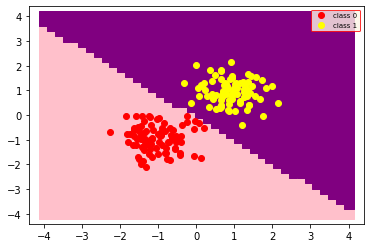

In [ ]:
plot_decision_boundary(model=lgr, arrayX=dataset.trainX, arrayY=dataset.trainY, N_gridpoints=40)

In [ ]:
model.coef_

AttributeError: ignored

In [ ]:
dataset = create_data_set(100, 1.0)

In [ ]:
lgr = LogisticRegression()
lgr.fit(dataset.trainX, dataset.trainY)
predictions = lgr.predict(dataset.testX)
print(f'accuracy: {accuracy_score(predictions, dataset.testY)}')

accuracy: 0.9


In [ ]:
knn = KNeighborsClassifier()
knn.fit(dataset.trainX, dataset.trainY)
predictions = knn.predict(dataset.testX)
print(f'accuracy: {accuracy_score(predictions, dataset.testY)}')

accuracy: 0.9


In [ ]:
model = Sequential([Dense(units=1, input_shape=[2])])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(dataset.trainX, dataset.trainY, epochs=100)
predictions = model.predict(dataset.testX)
print(f'accuracy: {accuracy_score(np.round(predictions.flatten()), dataset.testY)}')

Epoch 1/100
6/6 [==============================] - 1s 3ms/step - loss: 3.4187
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 1.9304
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 1.1344
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7003
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4520
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3165
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.2389
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1928
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 0.1623
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1435
Epoch 11/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1300
Epoch 12/100
6/6 [==============================] - 0s 3ms/step - loss: 0.1202
Epoch 13/100
6/6 [==============================] - 0s 3ms/st

1/1 [==============================] - 0s 41ms/step
accuracy: 0.9


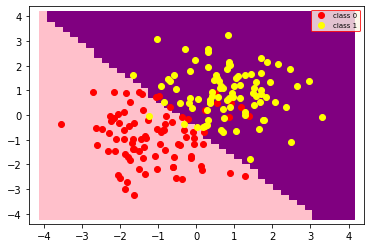

In [ ]:
plot_decision_boundary(model=lgr, arrayX=dataset.trainX, arrayY=dataset.trainY, N_gridpoints=40)

In [ ]:
dataset = create_data_set(200, 1.5)

In [ ]:
lgr = LogisticRegression()
lgr.fit(dataset.trainX, dataset.trainY)
predictions = lgr.predict(dataset.testX)
print(f'accuracy: {accuracy_score(predictions, dataset.testY)}')

accuracy: 0.75


In [ ]:
knn = KNeighborsClassifier()
knn.fit(dataset.trainX, dataset.trainY)
predictions = knn.predict(dataset.testX)
print(f'accuracy: {accuracy_score(predictions, dataset.testY)}')

accuracy: 0.65


In [ ]:
model = Sequential([Dense(units=1, input_shape=[2])])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(dataset.trainX, dataset.trainY, epochs=150)
predictions = model.predict(dataset.testX)
print(f'accuracy: {accuracy_score(np.round(predictions.flatten()), dataset.testY)}')

Epoch 1/150
12/12 [==============================] - 0s 2ms/step - loss: 1.1843
Epoch 2/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4066
Epoch 3/150
12/12 [==============================] - 0s 2ms/step - loss: 0.2541
Epoch 4/150
12/12 [==============================] - 0s 2ms/step - loss: 0.2032
Epoch 5/150
12/12 [==============================] - 0s 2ms/step - loss: 0.1770
Epoch 6/150
12/12 [==============================] - 0s 2ms/step - loss: 0.1618
Epoch 7/150
12/12 [==============================] - 0s 2ms/step - loss: 0.1524
Epoch 8/150
12/12 [==============================] - 0s 2ms/step - loss: 0.1467
Epoch 9/150
12/12 [==============================] - 0s 2ms/step - loss: 0.1430
Epoch 10/150
12/12 [==============================] - 0s 3ms/step - loss: 0.1410
Epoch 11/150
12/12 [==============================] - 0s 2ms/step - loss: 0.1396
Epoch 12/150
12/12 [==============================] - 0s 2ms/step - loss: 0.1388
Epoch 13/150
12/12 [=================

50/50 [==============================] - 0s 2ms/step


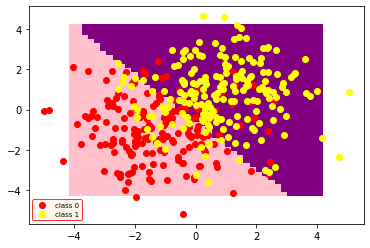

In [ ]:
plot_decision_boundary(model=model, arrayX=dataset.trainX, arrayY=dataset.trainY, N_gridpoints=40)

#Multiclass

In [ ]:
def create_normal_distributed_data(classes_scale: int, intersect_rate: float) -> DataSet:
    np.random.seed(0)
    l = classes_scale
    n = 2
    drop = intersect_rate

    X0 = np.array([[-2, -2]]) + drop * np.random.randn(l, n)
    X1 = np.array([[-2, 2]]) + drop * np.random.randn(l, n)
    X2 = np.array([[2, -2]]) + drop * np.random.randn(l, n)
    X3 = np.array([[2, 2]]) + drop * np.random.randn(l, n)

    # конкатенируем все в одну матрицу
    # при этом по 20 точек оставим на тест/валидацию
    X = np.vstack((X0[10:], X1[10:], X2[10:], X3[10:]))
    ValX = np.vstack((X0[:10], X1[:10], X2[:10], X3[:10]))

    # конкатенируем все в один столбец с соответствующими значениями для класса 0 или 1
    y = np.hstack([[0] * (l - 10), [1] * (l - 10), [2] * (l - 10), [3] * (l - 10)])
    ValY = np.hstack([[0] * 10, [1] * 10, [2] * 10, [3] * 10])

    return DataSet(trainX=X, trainY=y, testX=ValX, testY=ValY)


def create_data_set(classes_scale: int, intersect_rate: float) -> DataSet:
    # из этого можно сделать некоторую общую библиотеку
    return create_normal_distributed_data(classes_scale, intersect_rate)

In [ ]:
dataset = create_data_set(classes_scale=100, intersect_rate=0.5)

In [ ]:
lgr = LogisticRegression()
lgr.fit(dataset.trainX, dataset.trainY)
predictions = lgr.predict(dataset.testX)
print(f'accuracy: {accuracy_score(predictions, dataset.testY)}')

accuracy: 1.0


In [ ]:
knn = KNeighborsClassifier()
knn.fit(dataset.trainX, dataset.trainY)
predictions = knn.predict(dataset.testX)
print(f'accuracy: {accuracy_score(predictions, dataset.testY)}')

accuracy: 1.0


In [ ]:
def plot_decision_boudary(model, dataset: DataSet, N_gridpoints: int) -> None:
    # разбиваем область на точки
    _xx, _yy = np.linspace(-4, 4, N_gridpoints), np.linspace(-4, 4, N_gridpoints)

    _zz = np.zeros_like(_xx)


    points = []
    for i in range(N_gridpoints):
        for j in range(N_gridpoints):
            points.append([_xx[i], _yy[j]])

    _zz = model.predict(points)

    _zz = [_zz[i] for i in range(len(_zz))]

    colors = ['pink', 'purple', 'blue', 'red']

    for i in range(len(points)):
        if _zz[i] == 0:
            plt.scatter(x=points[i][0], y=points[i][1], s=150, c=colors[0], marker='s')
        elif _zz[i] == 1:
            plt.scatter(x=points[i][0], y=points[i][1], s=150, c=colors[1], marker='s')
        elif _zz[i] == 2:
            plt.scatter(x=points[i][0], y=points[i][1], s=150, c=colors[2], marker='s')
        elif _zz[i] == 3:
            plt.scatter(x=points[i][0], y=points[i][1], s=150, c=colors[3], marker='s')

    dataset_colors = ['green', 'yellow', 'black', 'orange']

    for k in np.unique(dataset.trainY):
        plt.plot(dataset.trainX[dataset.trainY == k, 0], dataset.trainX[dataset.trainY == k, 1], 'o', label=f'class {k} + {colors[k]}',
                 color=dataset_colors[k])

    plt.legend(fontsize=7, ncol=1, facecolor='oldlace', edgecolor='r')
    plt.show()

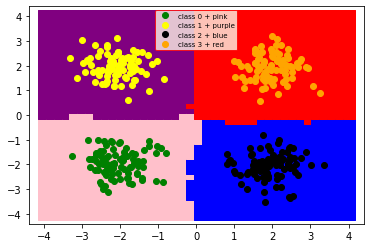

In [ ]:
plot_decision_boudary(model=knn, dataset=dataset, N_gridpoints=40)

In [ ]:
def create_normal_distributed_data(classes_scale: int, intersect_rate: float) -> DataSet:
    np.random.seed(0)
    l = classes_scale
    n = 2
    drop = intersect_rate

    X0 = np.array([[-2, -2]]) + drop * np.random.randn(l, n)
    X1 = np.array([[-2, 2]]) + drop * np.random.randn(l, n)
    X2 = np.array([[2, -2]]) + drop * np.random.randn(l, n)
    X3 = np.array([[2, 2]]) + drop * np.random.randn(l, n)

    # конкатенируем все в одну матрицу
    # при этом по 20 точек оставим на тест/валидацию
    X = np.vstack((X0[10:], X1[10:], X2[10:], X3[10:]))
    ValX = np.vstack((X0[:10], X1[:10], X2[:10], X3[:10]))

    # конкатенируем все в один столбец с соответствующими значениями для класса 0 или 1
    y = np.hstack([[0] * (l - 10), [0] * (l - 10), [1] * (l - 10), [1] * (l - 10)])
    ValY = np.hstack([[0] * 10, [0] * 10, [1] * 10, [1] * 10])

    return DataSet(trainX=X, trainY=y, testX=ValX, testY=ValY)


def create_data_set(classes_scale: int, intersect_rate: float) -> DataSet:
    # из этого можно сделать некоторую общую библиотеку
    return create_normal_distributed_data(classes_scale, intersect_rate)

In [ ]:
dataset = create_data_set(classes_scale=100, intersect_rate=0.5)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(dataset.trainX, dataset.trainY)
predictions = knn.predict(dataset.testX)
print(f'accuracy: {accuracy_score(predictions, dataset.testY)}')

accuracy: 1.0


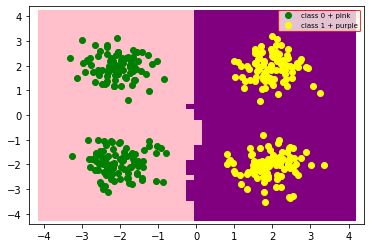

In [ ]:
plot_decision_boudary(model=knn, dataset=dataset, N_gridpoints=40)

#Ирисы Фишера

In [51]:
from sklearn import datasets
from sklearn.svm import LinearSVC

In [52]:
from sklearn.utils import shuffle

iris = datasets.load_iris()
x = iris.data
Y = iris.target

x, y = shuffle(x, np.array(Y), random_state=9123)

sep = round(len(x) * 0.1)

trainX, trainY = x[sep:], y[sep:]
testX, testY = x[:sep], y[:sep]

# return train_x, train_y, test_x, test_y

In [53]:
print(testY)

[1 2 1 0 0 1 1 2 1 0 0 2 2 0 0]


In [54]:
knn = KNeighborsClassifier()
knn.fit(trainX, trainY)
predictions = knn.predict(testX)
print(f'accuracy: {accuracy_score(predictions, testY)}')

accuracy: 1.0


In [55]:
svm = LinearSVC(random_state = 17, max_iter = 10000)
svm.fit(trainX, trainY)
predictions = svm.predict(testX)
print(f'accuracy: {accuracy_score(predictions, testY)}')
svm.coef_

accuracy: 1.0


array([[ 0.18635435,  0.42835061, -0.80076577, -0.3760851 ],
       [ 0.05769674, -0.85906431,  0.44885712, -1.04110374],
       [-0.84594016, -0.95959965,  1.34556818,  1.83147553]])

In [56]:
epochs = 1001
model = Sequential([Dense(3, activation=tf.nn.softmax, input_shape=[4])])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
train_history = model.fit(
    trainX,
    trainY,
    validation_data=(testX, testY),
    batch_size=2,
    epochs=epochs,
    verbose=2
)

Epoch 1/1001
68/68 - 1s - loss: 1.1794 - accuracy: 0.5259 - val_loss: 0.8291 - val_accuracy: 0.6667 - 622ms/epoch - 9ms/step
Epoch 2/1001
68/68 - 0s - loss: 0.7797 - accuracy: 0.6444 - val_loss: 0.6604 - val_accuracy: 0.7333 - 183ms/epoch - 3ms/step
Epoch 3/1001
68/68 - 0s - loss: 0.6741 - accuracy: 0.6963 - val_loss: 0.6367 - val_accuracy: 0.6667 - 162ms/epoch - 2ms/step
Epoch 4/1001
68/68 - 0s - loss: 0.6001 - accuracy: 0.7333 - val_loss: 0.5865 - val_accuracy: 0.7333 - 197ms/epoch - 3ms/step
Epoch 5/1001
68/68 - 0s - loss: 0.5971 - accuracy: 0.6815 - val_loss: 0.4874 - val_accuracy: 0.9333 - 192ms/epoch - 3ms/step
Epoch 6/1001
68/68 - 0s - loss: 0.5372 - accuracy: 0.7481 - val_loss: 0.4829 - val_accuracy: 0.6667 - 179ms/epoch - 3ms/step
Epoch 7/1001
68/68 - 0s - loss: 0.5286 - accuracy: 0.7556 - val_loss: 0.4792 - val_accuracy: 0.6667 - 179ms/epoch - 3ms/step
Epoch 8/1001
68/68 - 0s - loss: 0.5036 - accuracy: 0.7556 - val_loss: 0.4430 - val_accuracy: 0.6667 - 173ms/epoch - 3ms/step


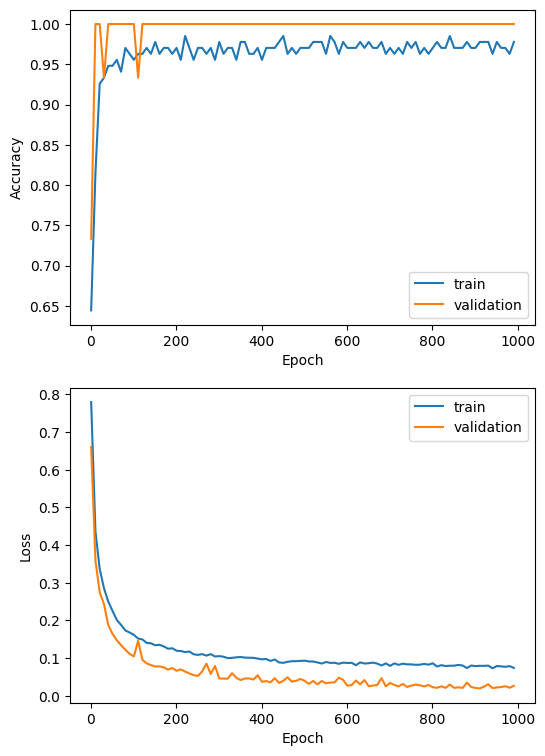

In [63]:
epoch_step = 10
steps = range(1, 1001, epoch_step)
# plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(steps, train_history.history["accuracy"][1::epoch_step], label="train")
ax1.plot(steps, train_history.history["val_accuracy"][1::epoch_step], label="validation")
ax1.set_ylabel("Accuracy")
# ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(steps, train_history.history["loss"][1::epoch_step], label="train")
ax2.plot(steps, train_history.history["val_loss"][1::epoch_step], label="validation")
ax2.set_ylabel("Loss")
# ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
# plt.tight_layout()
plt.show()

In [ ]:
model.layers[0].weights

[<tf.Variable 'dense/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[ 1.9285417 ,  1.1125098 , -2.4628818 ],
        [ 3.5180566 ,  0.40451193, -3.3808713 ],
        [-4.816961  ,  0.03218885,  5.476721  ],
        [-1.759135  , -3.0094867 ,  4.0903997 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(3,) dtype=float32, numpy=array([ 0.87402713,  2.3316145 , -3.2056081 ], dtype=float32)>]

In [64]:
with open('/content/drive/MyDrive/Colab Notebooks/diploma/fisher_3_test_acc.txt', 'r') as file:
    qml_data = file.readlines()

qml_test_acc = []
for line in qml_data:
    qml_test_acc.append(float(line[:len(line) - 1]))

with open('/content/drive/MyDrive/Colab Notebooks/diploma/fisher_3_test_loss.txt', 'r') as file:
    qml_data = file.readlines()

qml_test_loss = []
for line in qml_data:
    qml_test_loss.append(float(line[:len(line) - 1]))

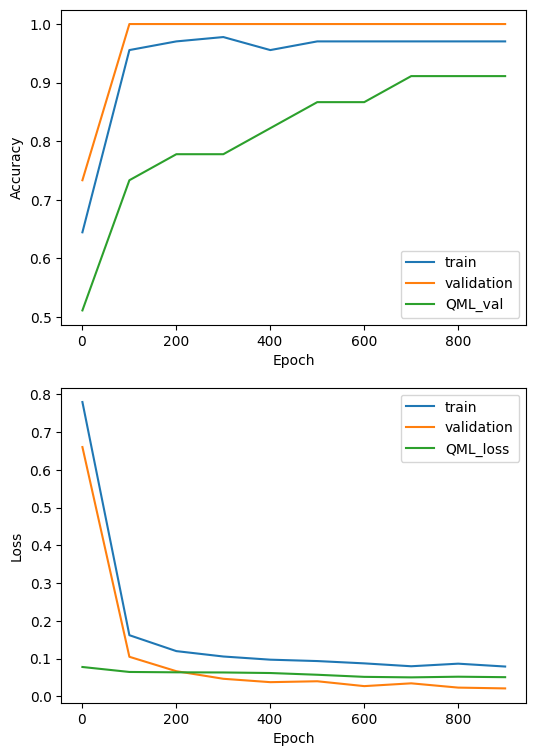

In [66]:
epoch_step = 100
steps = range(1, 1001, epoch_step)
# plt.style.use("seaborn")
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

plt.plot(steps, train_history.history["accuracy"][1::epoch_step], label="train")
ax1.plot(steps, train_history.history["val_accuracy"][1::epoch_step], label="validation")
ax1.plot(steps, qml_test_acc, label="QML_val")
ax1.set_ylabel("Accuracy")
# ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(steps, train_history.history["loss"][1::epoch_step], label="train")
ax2.plot(steps, train_history.history["val_loss"][1::epoch_step], label="validation")
ax2.plot(steps, qml_test_loss, label="QML_loss")
ax2.set_ylabel("Loss")
# ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
# plt.tight_layout()
plt.show()

# Fisher binary classification

In [67]:
from sklearn.utils import shuffle

def make_dataset(except_class: int):
    iris = datasets.load_iris()
    x = iris.data
    Y = iris.target

    y = Y[np.where(Y != except_class)]
    x = x[np.where(Y != except_class)]


    x, y = shuffle(x, np.array(y), random_state=7)

    sep = round(len(x) * 0.1)

    train_x, train_y = x[sep:], y[sep:]
    test_x, test_y = x[:sep], y[:sep]

    return train_x, train_y, test_x, test_y

In [68]:
def visualize_dataset(trainX, trainY) -> None:
    fig, axs = plt.subplots(nrows=4, ncols=4)

    colors = ['red', 'blue', 'green']
    test_colors = ['purple', 'black', 'yellow']

    for i in range(4):
        for j in range(4):
            for k in np.unique(trainY, axis=0):
                axs[i % 4, j % 4].plot(trainX[trainY == k, i],
                                       trainX[trainY == k, j],
                                       'o', label='class {}'.format(k), color=colors[k]
                                       )

#                 axs[i % 4, j % 4].plot(testX[testY == k, i],
#                                        testX[testY == k, j],
#                                        'o', label='test_class {}'.format(k), color=test_colors[k]
#                                        )

                axs[i % 4, j % 4].legend(fontsize=5,
                                         ncol=1,
                                         facecolor='oldlace',
                                         edgecolor='r'
                                         )

                # axs[i % 4, j % 4].set_xlim(-1, 10)
                # axs[i % 4, j % 4].set_ylim(-1, 10)

    fig.set_size_inches(10., 6.5)
    plt.show()

In [69]:
train_x, train_y, test_x, test_y = make_dataset(except_class = 2)

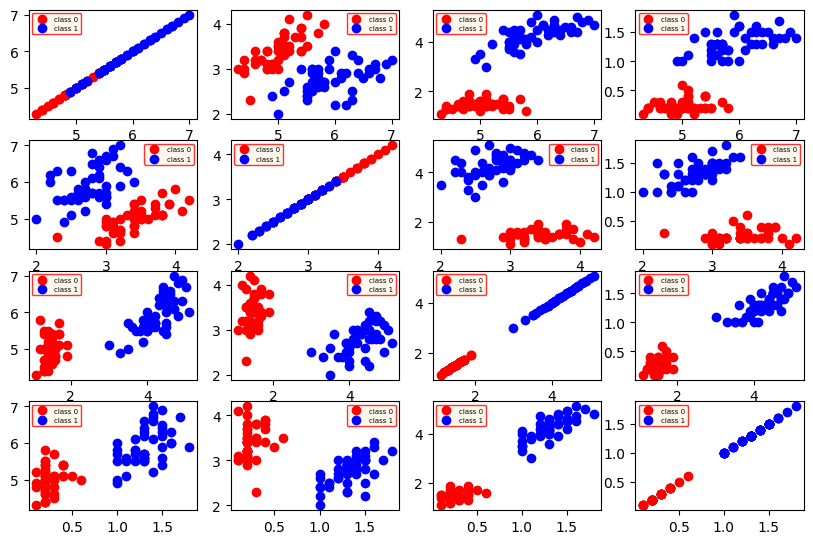

In [70]:
visualize_dataset(train_x, train_y)

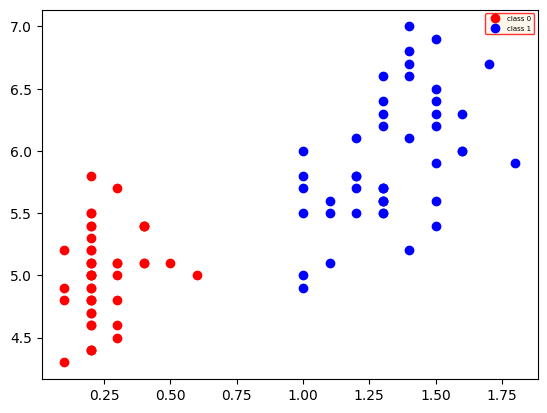

In [62]:
# fig, axs = plt.subplots(nrows=4, ncols=4)

colors = ['red', 'blue', 'green']
test_colors = ['purple', 'black', 'yellow']


for k in np.unique(train_y, axis=0):
    plt.plot(train_x[train_y == k, 3],
                            train_x[train_y == k, 0],
                            'o', label='class {}'.format(k), color=colors[k]
                            )

    plt.legend(fontsize=5,
                                ncol=1,
                                facecolor='oldlace',
                                edgecolor='r'
                                )

fig.set_size_inches(10., 6.5)
plt.show()

In [71]:
epochs = 101
batch_size = 2

model = Sequential([Dense(2, activation=tf.nn.softmax, input_shape=[4])])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
train_history = model.fit(
    train_x,
    train_y, 
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(test_x, test_y),
    verbose=2
    )

Epoch 1/101
45/45 - 1s - loss: 0.5835 - accuracy: 0.8889 - val_loss: 0.3193 - val_accuracy: 1.0000 - 551ms/epoch - 12ms/step
Epoch 2/101
45/45 - 0s - loss: 0.2829 - accuracy: 1.0000 - val_loss: 0.2371 - val_accuracy: 1.0000 - 125ms/epoch - 3ms/step
Epoch 3/101
45/45 - 0s - loss: 0.2141 - accuracy: 1.0000 - val_loss: 0.1710 - val_accuracy: 1.0000 - 112ms/epoch - 2ms/step
Epoch 4/101
45/45 - 0s - loss: 0.1670 - accuracy: 1.0000 - val_loss: 0.1372 - val_accuracy: 1.0000 - 141ms/epoch - 3ms/step
Epoch 5/101
45/45 - 0s - loss: 0.1395 - accuracy: 1.0000 - val_loss: 0.1144 - val_accuracy: 1.0000 - 127ms/epoch - 3ms/step
Epoch 6/101
45/45 - 0s - loss: 0.1188 - accuracy: 1.0000 - val_loss: 0.0991 - val_accuracy: 1.0000 - 128ms/epoch - 3ms/step
Epoch 7/101
45/45 - 0s - loss: 0.1022 - accuracy: 1.0000 - val_loss: 0.0851 - val_accuracy: 1.0000 - 116ms/epoch - 3ms/step
Epoch 8/101
45/45 - 0s - loss: 0.0914 - accuracy: 1.0000 - val_loss: 0.0762 - val_accuracy: 1.0000 - 129ms/epoch - 3ms/step
Epoch 9

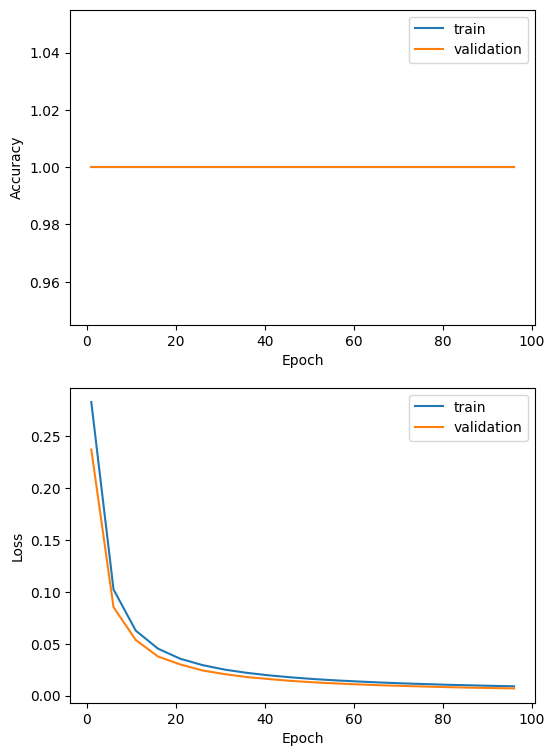

In [72]:
epoch_step = 5
steps = range(1, 101, epoch_step)
# plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(steps, train_history.history["accuracy"][1::epoch_step], label="train")
ax1.plot(steps, train_history.history["val_accuracy"][1::epoch_step], label="validation")
ax1.set_ylabel("Accuracy")
# ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(steps, train_history.history["loss"][1::epoch_step], label="train")
ax2.plot(steps, train_history.history["val_loss"][1::epoch_step], label="validation")
ax2.set_ylabel("Loss")
# ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
# plt.tight_layout()
plt.show()

In [73]:
with open('/content/drive/MyDrive/Colab Notebooks/diploma/fisher_2_test_acc.txt', 'r') as file:
    qml_data = file.readlines()

qml_test_acc = []
for line in qml_data:
    qml_test_acc.append(float(line[:len(line) - 1]))

with open('/content/drive/MyDrive/Colab Notebooks/diploma/fisher_2_test_loss.txt', 'r') as file:
    qml_data = file.readlines()

qml_test_loss = []
for line in qml_data:
    qml_test_loss.append(float(line[:len(line) - 1]))

In [80]:
len(train_history.history["accuracy"])

101

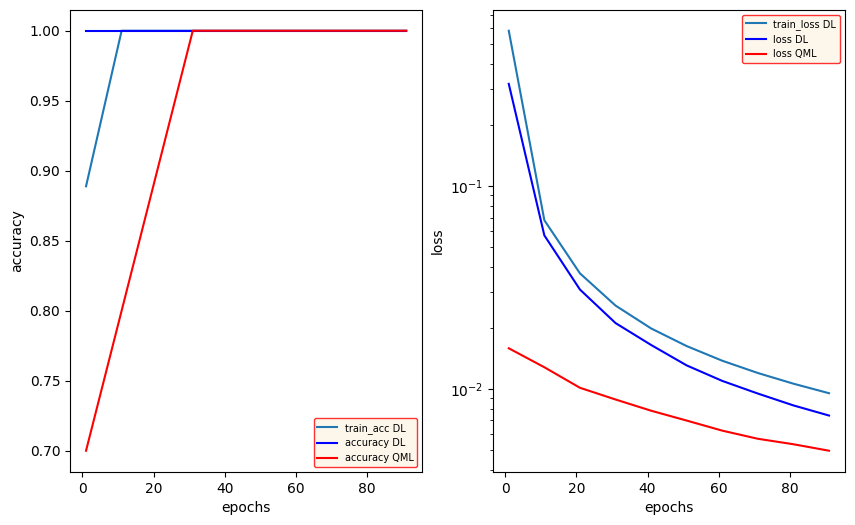

In [82]:
# plt.plot(epochs, test_acc)
epoch_step = 10
epochs = range(1, 101, 10)

fig, ax = plt.subplots(ncols=2, figsize=(10, 6))
# ax[0].set_yscale('log')

ax[0].plot(epochs, train_history.history["accuracy"][:100:epoch_step], label="train_acc DL")
ax[0].plot(epochs, train_history.history["val_accuracy"][:100:epoch_step], color = 'blue', label = 'accuracy DL')
ax[0].plot(epochs, qml_test_acc[:10], color='red', label='accuracy QML')
ax[0].legend(fontsize=7, ncol=1, facecolor='oldlace', edgecolor='r')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')

ax[1].set_yscale('log')

ax[1].plot(epochs, train_history.history["loss"][:100:epoch_step], label="train_loss DL")
ax[1].plot(epochs, train_history.history["val_loss"][0:100:epoch_step], color = 'blue', label = 'loss DL')
ax[1].plot(epochs, qml_test_loss[:10], color = 'red', label = 'loss QML')
ax[1].legend(fontsize=7, ncol=1, facecolor='oldlace', edgecolor='r')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')

plt.show()

In [ ]:
model.layers[0].weights

[<tf.Variable 'dense_37/kernel:0' shape=(4, 2) dtype=float32, numpy=
 array([[-0.4727869 , -0.07836697],
        [ 1.2725135 , -0.28155437],
        [ 0.08573823,  0.9235408 ],
        [-0.32376277,  0.39064252]], dtype=float32)>,
 <tf.Variable 'dense_37/bias:0' shape=(2,) dtype=float32, numpy=array([ 0.08702427, -0.08702429], dtype=float32)>]

# Другие два класса

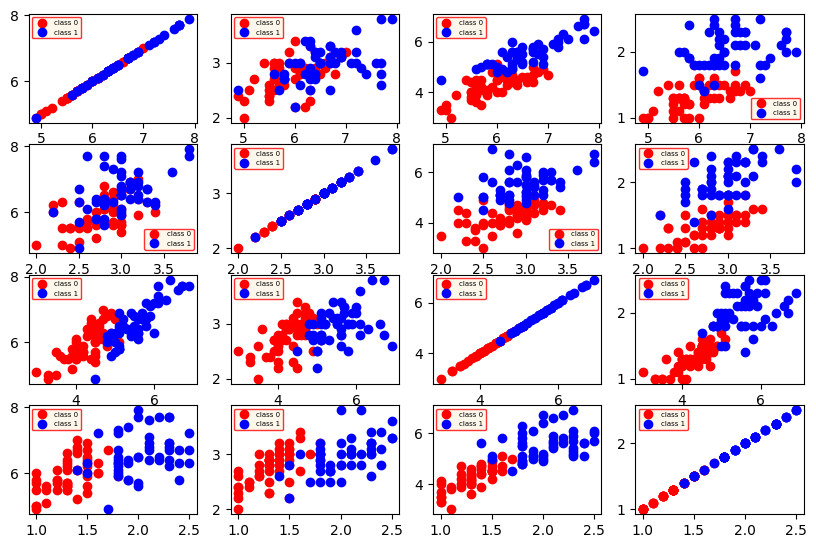

In [17]:
iris = datasets.load_iris()
x = iris.data
Y = iris.target

y = Y[np.where(Y != 0)]
x = x[np.where(Y != 0)]

y = np.where(y == 1, 0, 1)

visualize_dataset(x, y)

x, y = shuffle(x, np.array(y), random_state=7)

sep = round(len(x) * 0.1)

train_x, train_y = x[sep:], y[sep:]
test_x, test_y = x[:sep], y[:sep]

In [19]:
test_y

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [20]:
epochs = 101
batch_size = 2

model = Sequential([Dense(2, activation=tf.nn.softmax, input_shape=[4])])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
train_history = model.fit(
    train_x,
    train_y, 
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(test_x, test_y),
    verbose=2
    )

Epoch 1/101
45/45 - 1s - loss: 1.1636 - accuracy: 0.4556 - val_loss: 0.6701 - val_accuracy: 0.6000 - 1s/epoch - 27ms/step
Epoch 2/101
45/45 - 0s - loss: 0.8307 - accuracy: 0.5222 - val_loss: 0.6151 - val_accuracy: 0.7000 - 310ms/epoch - 7ms/step
Epoch 3/101
45/45 - 0s - loss: 0.8157 - accuracy: 0.4444 - val_loss: 0.5541 - val_accuracy: 0.8000 - 240ms/epoch - 5ms/step
Epoch 4/101
45/45 - 0s - loss: 0.7666 - accuracy: 0.5222 - val_loss: 0.7838 - val_accuracy: 0.5000 - 253ms/epoch - 6ms/step
Epoch 5/101
45/45 - 0s - loss: 0.7504 - accuracy: 0.5444 - val_loss: 0.5685 - val_accuracy: 0.6000 - 291ms/epoch - 6ms/step
Epoch 6/101
45/45 - 0s - loss: 0.7015 - accuracy: 0.5111 - val_loss: 0.4634 - val_accuracy: 1.0000 - 279ms/epoch - 6ms/step
Epoch 7/101
45/45 - 0s - loss: 0.6837 - accuracy: 0.5667 - val_loss: 0.4483 - val_accuracy: 0.9000 - 326ms/epoch - 7ms/step
Epoch 8/101
45/45 - 0s - loss: 0.6038 - accuracy: 0.6667 - val_loss: 0.4283 - val_accuracy: 1.0000 - 281ms/epoch - 6ms/step
Epoch 9/10

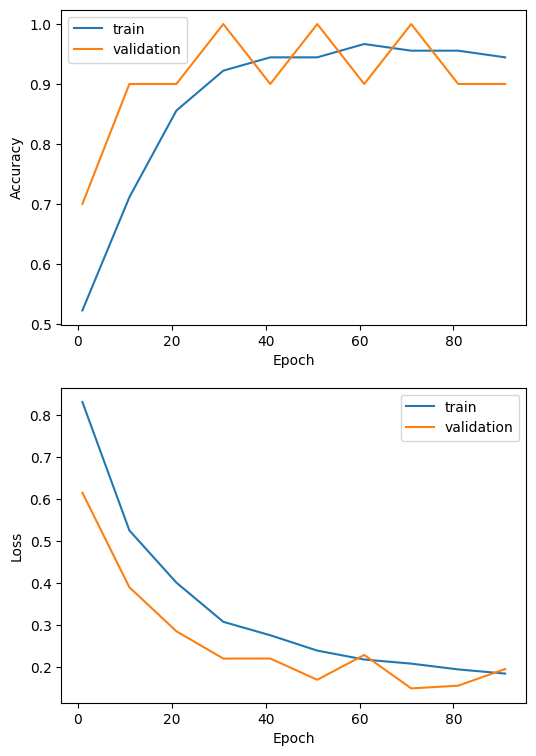

In [23]:
epoch_step = 10
steps = range(1, 101, epoch_step)
# plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(steps, train_history.history["accuracy"][1::epoch_step], label="train")
ax1.plot(steps, train_history.history["val_accuracy"][1::epoch_step], label="validation")
ax1.set_ylabel("Accuracy")
# ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(steps, train_history.history["loss"][1::epoch_step], label="train")
ax2.plot(steps, train_history.history["val_loss"][1::epoch_step], label="validation")
ax2.set_ylabel("Loss")
# ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
# plt.tight_layout()
plt.show()